In [37]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Input
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import mean_squared_error

In [3]:
data = pd.read_csv('data_X4.csv')

In [17]:
data

,CONGRESSIONALDISTRICT,HIGHEST_ALARM_LEVEL,DISPATCH_RESPONSE_SECONDS_QY,INCIDENT_TRAVEL_TM_SECONDS_QY,ENGINES_ASSIGNED_QUANTITY,LADDERS_ASSIGNED_QUANTITY,OTHER_UNITS_ASSIGNED_QUANTITY,LATITUDE,LONGITUDE,POP200,...,INCIDENT_CLASSIFICATION_Other Transportation Fire,INCIDENT_CLASSIFICATION_Private Dwelling Fire,INCIDENT_CLASSIFICATION_School Fire,INCIDENT_CLASSIFICATION_Store Fire,INCIDENT_CLASSIFICATION_Theater or TV Studio Fire,INCIDENT_CLASSIFICATION_Transit System - NonStructural,INCIDENT_CLASSIFICATION_Transit System - Structural,INCIDENT_CLASSIFICATION_Under Contruction / Vacant Fire,INCIDENT_CLASSIFICATION_Untenanted Building Fire,ResolutionTime
0,8,1,38.0,187.0,1.0,1.0,0.0,40.729553,-73.989900,246.819357,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2551.0
1,8,1,24.0,149.0,3.0,2.0,1.0,40.729553,-73.989900,246.819357,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,967.0
2,8,1,37.0,85.0,4.0,2.0,1.0,40.729553,-73.989900,246.819357,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1746.0
3,8,1,61.0,267.0,1.0,1.0,0.0,40.729553,-73.989900,246.819357,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,372.0
4,8,1,19.0,109.0,4.0,2.0,1.0,40.729553,-73.989900,246.819357,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1300.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96684,2,1,37.0,333.0,1.0,0.0,0.0,40.716017,-73.886351,46.376524,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,971.0
96685,2,1,32.0,316.0,1.0,0.0,0.0,40.743107,-73.815676,57.568309,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,319.0
96686,9,1,50.0,326.0,1.0,1.0,0.0,40.789511,-73.937502,162.943927,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2768.0
96687,7,1,38.0,218.0,4.0,2.0,1.0,40.541210,-74.155249,35.901185,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4270.0


### BASIC ANN WITH ALL THE COLUMNS AS FEATURES

In [4]:
# Split the data into features and target variable
X = data.drop('ResolutionTime', axis=1)
y = data['ResolutionTime']

In [23]:
# Split the data
# random state = 42, by science fiction called "The Hitchhiker's Guide to the Galaxy" authored by Douglas Adams in 1978.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [24]:
# build the model
model = Sequential([
    Input(shape=(X_train_scaled.shape[1],)),  
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(1)
])

In [25]:
model.compile(optimizer=Adam(), loss='mean_squared_error')

In [26]:
model.fit(X_train_scaled, y_train, epochs=100, batch_size=32, validation_split=0.1)

Epoch 1/100
2176/2176 ━━━━━━━━━━━━━━━━━━━━ 2s 495us/step - loss: 13164920.0000 - val_loss: 21356010.0000
Epoch 2/100
2176/2176 ━━━━━━━━━━━━━━━━━━━━ 1s 432us/step - loss: 10300254.0000 - val_loss: 20809836.0000
Epoch 3/100
2176/2176 ━━━━━━━━━━━━━━━━━━━━ 1s 448us/step - loss: 8700011.0000 - val_loss: 20464106.0000
Epoch 4/100
2176/2176 ━━━━━━━━━━━━━━━━━━━━ 1s 442us/step - loss: 9557587.0000 - val_loss: 20158182.0000
Epoch 5/100
2176/2176 ━━━━━━━━━━━━━━━━━━━━ 1s 433us/step - loss: 11025066.0000 - val_loss: 20013912.0000
Epoch 6/100
2176/2176 ━━━━━━━━━━━━━━━━━━━━ 1s 443us/step - loss: 10220932.0000 - val_loss: 19810888.0000
Epoch 7/100
2176/2176 ━━━━━━━━━━━━━━━━━━━━ 1s 462us/step - loss: 19044516.0000 - val_loss: 19856854.0000
Epoch 8/100
2176/2176 ━━━━━━━━━━━━━━━━━━━━ 1s 442us/step - loss: 12198727.0000 - val_loss: 19577968.0000
Epoch 9/100
2176/2176 ━━━━━━━━━━━━━━━━━━━━ 1s 444us/step - loss: 12388079.0000 - val_loss: 19603564.0000
Epoch 10/100
2176/2176 ━━━━━━━━━━━━━━━━━━━━ 1s 457us/step

2176/2176 ━━━━━━━━━━━━━━━━━━━━ 1s 493us/step - loss: 9819991.0000 - val_loss: 15712925.0000
Epoch 60/100
2176/2176 ━━━━━━━━━━━━━━━━━━━━ 1s 480us/step - loss: 7094937.0000 - val_loss: 15625608.0000
Epoch 61/100
2176/2176 ━━━━━━━━━━━━━━━━━━━━ 1s 484us/step - loss: 9608613.0000 - val_loss: 15716624.0000
Epoch 62/100
2176/2176 ━━━━━━━━━━━━━━━━━━━━ 1s 482us/step - loss: 6799675.0000 - val_loss: 16317074.0000
Epoch 63/100
2176/2176 ━━━━━━━━━━━━━━━━━━━━ 1s 542us/step - loss: 7498366.5000 - val_loss: 15365055.0000
Epoch 64/100
2176/2176 ━━━━━━━━━━━━━━━━━━━━ 1s 519us/step - loss: 5746521.0000 - val_loss: 14994158.0000
Epoch 65/100
2176/2176 ━━━━━━━━━━━━━━━━━━━━ 1s 528us/step - loss: 10072564.0000 - val_loss: 15576339.0000
Epoch 66/100
2176/2176 ━━━━━━━━━━━━━━━━━━━━ 1s 538us/step - loss: 18585478.0000 - val_loss: 15406552.0000
Epoch 67/100
2176/2176 ━━━━━━━━━━━━━━━━━━━━ 1s 479us/step - loss: 13421299.0000 - val_loss: 15325656.0000
Epoch 68/100
2176/2176 ━━━━━━━━━━━━━━━━━━━━ 1s 468us/step - loss:

In [27]:
# Evaluate the model
predictions = model.predict(X_test_scaled)
mse = mean_squared_error(y_test, predictions)
print('Mean Squared Error:', mse)

605/605 ━━━━━━━━━━━━━━━━━━━━ 0s 423us/step
Mean Squared Error: 5863042.968752565


Since the MSE seems too large, try to optimize the model

### Optimization

In [29]:
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping

In [30]:
# Build a more complex ANN model with regularization and dropout
model = Sequential([
    Input(shape=(X_train_scaled.shape[1],)),
    Dense(256, activation='relu', kernel_regularizer=l2(0.01)),
    Dropout(0.5),
    Dense(128, activation='relu', kernel_regularizer=l2(0.01)),
    Dropout(0.5),
    Dense(1)
])

In [31]:
# Compile the model with a more aggressive optimizer
optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='mean_squared_error')

In [35]:
import matplotlib.pyplot as plt

In [46]:
# Train the model and save the history
history = model.fit(X_train_scaled, y_train, epochs=200, batch_size=64, validation_split=0.1)

Epoch 1/200
1088/1088 ━━━━━━━━━━━━━━━━━━━━ 1s 725us/step - loss: 7514105.5000 - val_loss: 12666157.0000
Epoch 2/200
1088/1088 ━━━━━━━━━━━━━━━━━━━━ 1s 721us/step - loss: 5692697.5000 - val_loss: 12711623.0000
Epoch 3/200
1088/1088 ━━━━━━━━━━━━━━━━━━━━ 1s 709us/step - loss: 6434052.5000 - val_loss: 12688830.0000
Epoch 4/200
1088/1088 ━━━━━━━━━━━━━━━━━━━━ 1s 708us/step - loss: 7525507.5000 - val_loss: 12979591.0000
Epoch 5/200
1088/1088 ━━━━━━━━━━━━━━━━━━━━ 1s 712us/step - loss: 6125803.0000 - val_loss: 12777489.0000
Epoch 6/200
1088/1088 ━━━━━━━━━━━━━━━━━━━━ 1s 737us/step - loss: 5970287.5000 - val_loss: 12780960.0000
Epoch 7/200
1088/1088 ━━━━━━━━━━━━━━━━━━━━ 1s 709us/step - loss: 9596881.0000 - val_loss: 12689719.0000
Epoch 8/200
1088/1088 ━━━━━━━━━━━━━━━━━━━━ 1s 733us/step - loss: 5397007.0000 - val_loss: 12583601.0000
Epoch 9/200
1088/1088 ━━━━━━━━━━━━━━━━━━━━ 1s 723us/step - loss: 6368967.0000 - val_loss: 12618699.0000
Epoch 10/200
1088/1088 ━━━━━━━━━━━━━━━━━━━━ 1s 698us/step - loss

1088/1088 ━━━━━━━━━━━━━━━━━━━━ 1s 733us/step - loss: 6802856.0000 - val_loss: 12638700.0000
Epoch 61/200
1088/1088 ━━━━━━━━━━━━━━━━━━━━ 1s 726us/step - loss: 5180954.0000 - val_loss: 12517653.0000
Epoch 62/200
1088/1088 ━━━━━━━━━━━━━━━━━━━━ 1s 734us/step - loss: 5865703.0000 - val_loss: 12347731.0000
Epoch 63/200
1088/1088 ━━━━━━━━━━━━━━━━━━━━ 1s 736us/step - loss: 4914381.0000 - val_loss: 12607459.0000
Epoch 64/200
1088/1088 ━━━━━━━━━━━━━━━━━━━━ 1s 739us/step - loss: 6466518.0000 - val_loss: 12746001.0000
Epoch 65/200
1088/1088 ━━━━━━━━━━━━━━━━━━━━ 1s 738us/step - loss: 7600642.0000 - val_loss: 12533426.0000
Epoch 66/200
1088/1088 ━━━━━━━━━━━━━━━━━━━━ 1s 739us/step - loss: 5856695.0000 - val_loss: 12640253.0000
Epoch 67/200
1088/1088 ━━━━━━━━━━━━━━━━━━━━ 1s 820us/step - loss: 6332826.0000 - val_loss: 12569882.0000
Epoch 68/200
1088/1088 ━━━━━━━━━━━━━━━━━━━━ 1s 817us/step - loss: 5479042.5000 - val_loss: 12795350.0000
Epoch 69/200
1088/1088 ━━━━━━━━━━━━━━━━━━━━ 1s 797us/step - loss: 97

Epoch 119/200
1088/1088 ━━━━━━━━━━━━━━━━━━━━ 1s 764us/step - loss: 5691837.0000 - val_loss: 12807342.0000
Epoch 120/200
1088/1088 ━━━━━━━━━━━━━━━━━━━━ 1s 811us/step - loss: 6794286.0000 - val_loss: 12781034.0000
Epoch 121/200
1088/1088 ━━━━━━━━━━━━━━━━━━━━ 1s 817us/step - loss: 5952791.0000 - val_loss: 12578002.0000
Epoch 122/200
1088/1088 ━━━━━━━━━━━━━━━━━━━━ 1s 767us/step - loss: 6427351.0000 - val_loss: 12479602.0000
Epoch 123/200
1088/1088 ━━━━━━━━━━━━━━━━━━━━ 1s 854us/step - loss: 5382513.5000 - val_loss: 12643344.0000
Epoch 124/200
1088/1088 ━━━━━━━━━━━━━━━━━━━━ 1s 765us/step - loss: 6057748.5000 - val_loss: 12536064.0000
Epoch 125/200
1088/1088 ━━━━━━━━━━━━━━━━━━━━ 1s 734us/step - loss: 6070111.5000 - val_loss: 12456095.0000
Epoch 126/200
1088/1088 ━━━━━━━━━━━━━━━━━━━━ 1s 744us/step - loss: 6396409.0000 - val_loss: 12412496.0000
Epoch 127/200
1088/1088 ━━━━━━━━━━━━━━━━━━━━ 1s 747us/step - loss: 7051176.5000 - val_loss: 12626267.0000
Epoch 128/200
1088/1088 ━━━━━━━━━━━━━━━━━━━━ 1

1088/1088 ━━━━━━━━━━━━━━━━━━━━ 1s 770us/step - loss: 7427190.5000 - val_loss: 12487733.0000
Epoch 178/200
1088/1088 ━━━━━━━━━━━━━━━━━━━━ 1s 845us/step - loss: 4881637.5000 - val_loss: 12694100.0000
Epoch 179/200
1088/1088 ━━━━━━━━━━━━━━━━━━━━ 1s 799us/step - loss: 5602573.5000 - val_loss: 12640276.0000
Epoch 180/200
1088/1088 ━━━━━━━━━━━━━━━━━━━━ 1s 768us/step - loss: 4220489.5000 - val_loss: 12655528.0000
Epoch 181/200
1088/1088 ━━━━━━━━━━━━━━━━━━━━ 1s 774us/step - loss: 4833754.0000 - val_loss: 12461375.0000
Epoch 182/200
1088/1088 ━━━━━━━━━━━━━━━━━━━━ 1s 778us/step - loss: 7814945.0000 - val_loss: 12594459.0000
Epoch 183/200
1088/1088 ━━━━━━━━━━━━━━━━━━━━ 1s 764us/step - loss: 8543557.0000 - val_loss: 12809462.0000
Epoch 184/200
1088/1088 ━━━━━━━━━━━━━━━━━━━━ 1s 763us/step - loss: 6271855.0000 - val_loss: 12807780.0000
Epoch 185/200
1088/1088 ━━━━━━━━━━━━━━━━━━━━ 1s 767us/step - loss: 4863374.0000 - val_loss: 12691453.0000
Epoch 186/200
1088/1088 ━━━━━━━━━━━━━━━━━━━━ 1s 775us/step -

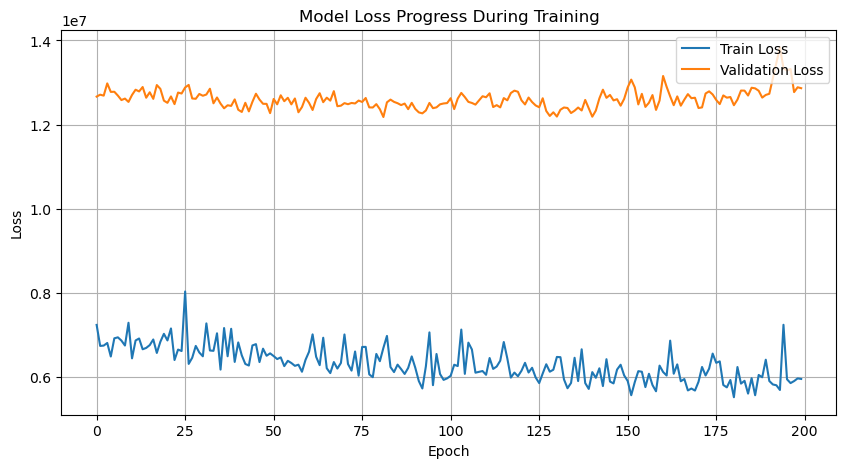

In [47]:
# Plot training & validation loss values
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss Progress During Training')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()

In [48]:
# Evaluate the model
predictions = model.predict(X_test_scaled)
mse = mean_squared_error(y_test, predictions)
print('Mean Squared Error:', mse)

605/605 ━━━━━━━━━━━━━━━━━━━━ 0s 353us/step
Mean Squared Error: 6597238.544674902


We find out that the MSE increased after the optimize the model. 
Overfitting may occurs, because our model contains too many features and the model just learns the details and noise in the training data to an extent that it negatively impacts the performance on new data.

Then, We will use the top 30 features that we selected from the four models in order to aviod overfitting.

The reason we use 28 features: after we run PCA, we find out that after Reduced the number of features to 28, those will explained variance ratio > 0.8.

### Based on Feature Importance Analysis:
ENGINES_ASSIGNED_QUANTITY: Ranked highly across Random Forest, XGBoost, Linear Regression, and Lasso. This consistency and the high scores make it a top feature.


LATITUDE and LONGITUDE: Both features consistently show up across models with substantial scores, indicating their strong predictive power regarding geographic factors.


HIGHEST_ALARM_LEVEL: Shows strong importance in Random Forest, XGBoost, and both regression models, which suggests it significantly impacts the target variable


OTHER_UNITS_ASSIGNED_QUANTITY: Also appears frequently with high scores in multiple models.
INCIDENT_CLASSIFICATION_Under Contruction / Vacant Fire: Highlighted in both regression models with very high scores, reflecting strong specific situational influence.


INCIDENT_CLASSIFICATION_Automobile Fire and INCIDENT_CLASSIFICATION_Other Transportation Fire: These show relevance in multiple models, pointing to particular types of incidents impacting resolution time.

weekday and hour: Appear in both Random Forest and XGBoost, indicating temporal factors are predictive.

### Features We Selected

In [49]:
selected_features = [
    'ENGINES_ASSIGNED_QUANTITY', 'OTHER_UNITS_ASSIGNED_QUANTITY', 'LATITUDE', 'LONGITUDE', 
    'HIGHEST_ALARM_LEVEL', 'INCIDENT_CLASSIFICATION_Under Contruction / Vacant Fire', 
    'INCIDENT_CLASSIFICATION_Other Transportation Fire', 'INCIDENT_CLASSIFICATION_Automobile Fire',
    'INCIDENT_CLASSIFICATION_Demolition Debris or Rubbish Fire', 'INCIDENT_CLASSIFICATION_Multiple Dwelling \'A\' - Other fire',
    'INCIDENT_CLASSIFICATION_Multiple Dwelling \'A\' - Food on the stove fire', 'INCIDENT_CLASSIFICATION_Factory Fire', 
    'INCIDENT_CLASSIFICATION_Store Fire', 'INCIDENT_CLASSIFICATION_Private Dwelling Fire', 
    'INCIDENT_CLASSIFICATION_Multiple Dwelling \'B\' Fire', 'INCIDENT_CLASSIFICATION_Manhole Fire - Blown Cover',
    'INCIDENT_CLASSIFICATION_Manhole Fire - Extended to Building', 'INCIDENT_CLASSIFICATION_Manhole Fire - Other',
    'INCIDENT_CLASSIFICATION_Brush Fire', 'INCIDENT_CLASSIFICATION_Other Public Building Fire',
    'INCIDENT_CLASSIFICATION_Other Commercial Building Fire', 'weekday', 'hour', 'Precipitation',
    'MaxTemperature', 'AvgTemperature', 'DISPATCH_RESPONSE_SECONDS_QY', 'LADDERS_ASSIGNED_QUANTITY'
]

### ANN WITH SELECTED FEATURES

In [50]:
X = data[selected_features]
y = data['ResolutionTime']

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [57]:
X_train_scaled.shape[1]

28

In [58]:
model = Sequential([
    Input(shape=(X_train_scaled.shape[1],)),
    Dense(256, activation='relu'),
    Dropout(0.3),
    Dense(128, activation='relu'), 
    Dropout(0.3),
    Dense(1)
])

In [59]:
model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

In [60]:
history = model.fit(X_train_scaled, y_train, epochs=200, batch_size=64, validation_split=0.1)

Epoch 1/200
1088/1088 ━━━━━━━━━━━━━━━━━━━━ 2s 769us/step - loss: 21325566.0000 - val_loss: 22175472.0000
Epoch 2/200
1088/1088 ━━━━━━━━━━━━━━━━━━━━ 1s 673us/step - loss: 12739414.0000 - val_loss: 20883336.0000
Epoch 3/200
1088/1088 ━━━━━━━━━━━━━━━━━━━━ 1s 673us/step - loss: 15065147.0000 - val_loss: 20664414.0000
Epoch 4/200
1088/1088 ━━━━━━━━━━━━━━━━━━━━ 1s 665us/step - loss: 17182192.0000 - val_loss: 20372484.0000
Epoch 5/200
1088/1088 ━━━━━━━━━━━━━━━━━━━━ 1s 666us/step - loss: 14256483.0000 - val_loss: 20054604.0000
Epoch 6/200
1088/1088 ━━━━━━━━━━━━━━━━━━━━ 1s 676us/step - loss: 11614825.0000 - val_loss: 20012952.0000
Epoch 7/200
1088/1088 ━━━━━━━━━━━━━━━━━━━━ 1s 681us/step - loss: 13316608.0000 - val_loss: 19963920.0000
Epoch 8/200
1088/1088 ━━━━━━━━━━━━━━━━━━━━ 1s 677us/step - loss: 14308923.0000 - val_loss: 19839652.0000
Epoch 9/200
1088/1088 ━━━━━━━━━━━━━━━━━━━━ 1s 671us/step - loss: 9890834.0000 - val_loss: 19716102.0000
Epoch 10/200
1088/1088 ━━━━━━━━━━━━━━━━━━━━ 1s 676us/ste

1088/1088 ━━━━━━━━━━━━━━━━━━━━ 1s 720us/step - loss: 9695137.0000 - val_loss: 16365178.0000
Epoch 60/200
1088/1088 ━━━━━━━━━━━━━━━━━━━━ 1s 712us/step - loss: 12149773.0000 - val_loss: 16247408.0000
Epoch 61/200
1088/1088 ━━━━━━━━━━━━━━━━━━━━ 1s 677us/step - loss: 8672877.0000 - val_loss: 15699095.0000
Epoch 62/200
1088/1088 ━━━━━━━━━━━━━━━━━━━━ 1s 735us/step - loss: 8869306.0000 - val_loss: 16022478.0000
Epoch 63/200
1088/1088 ━━━━━━━━━━━━━━━━━━━━ 1s 712us/step - loss: 14778628.0000 - val_loss: 15803874.0000
Epoch 64/200
1088/1088 ━━━━━━━━━━━━━━━━━━━━ 1s 680us/step - loss: 6828328.5000 - val_loss: 15609161.0000
Epoch 65/200
1088/1088 ━━━━━━━━━━━━━━━━━━━━ 1s 681us/step - loss: 8615671.0000 - val_loss: 16047671.0000
Epoch 66/200
1088/1088 ━━━━━━━━━━━━━━━━━━━━ 1s 683us/step - loss: 7777389.0000 - val_loss: 15996561.0000
Epoch 67/200
1088/1088 ━━━━━━━━━━━━━━━━━━━━ 1s 675us/step - loss: 10683966.0000 - val_loss: 15948202.0000
Epoch 68/200
1088/1088 ━━━━━━━━━━━━━━━━━━━━ 1s 679us/step - loss:

1088/1088 ━━━━━━━━━━━━━━━━━━━━ 1s 694us/step - loss: 5886947.0000 - val_loss: 13347604.0000
Epoch 118/200
1088/1088 ━━━━━━━━━━━━━━━━━━━━ 1s 750us/step - loss: 7080481.0000 - val_loss: 13286508.0000
Epoch 119/200
1088/1088 ━━━━━━━━━━━━━━━━━━━━ 1s 738us/step - loss: 8252669.0000 - val_loss: 13290860.0000
Epoch 120/200
1088/1088 ━━━━━━━━━━━━━━━━━━━━ 1s 727us/step - loss: 7258374.0000 - val_loss: 13336432.0000
Epoch 121/200
1088/1088 ━━━━━━━━━━━━━━━━━━━━ 1s 704us/step - loss: 5629536.5000 - val_loss: 13313480.0000
Epoch 122/200
1088/1088 ━━━━━━━━━━━━━━━━━━━━ 1s 693us/step - loss: 5380806.0000 - val_loss: 13032646.0000
Epoch 123/200
1088/1088 ━━━━━━━━━━━━━━━━━━━━ 1s 685us/step - loss: 9562426.0000 - val_loss: 13433106.0000
Epoch 124/200
1088/1088 ━━━━━━━━━━━━━━━━━━━━ 1s 703us/step - loss: 7339552.0000 - val_loss: 12974586.0000
Epoch 125/200
1088/1088 ━━━━━━━━━━━━━━━━━━━━ 1s 724us/step - loss: 7448091.0000 - val_loss: 12980689.0000
Epoch 126/200
1088/1088 ━━━━━━━━━━━━━━━━━━━━ 1s 692us/step -

1088/1088 ━━━━━━━━━━━━━━━━━━━━ 1s 773us/step - loss: 7097363.0000 - val_loss: 12203954.0000
Epoch 176/200
1088/1088 ━━━━━━━━━━━━━━━━━━━━ 1s 812us/step - loss: 6606882.0000 - val_loss: 12179957.0000
Epoch 177/200
1088/1088 ━━━━━━━━━━━━━━━━━━━━ 1s 822us/step - loss: 8191670.5000 - val_loss: 12053456.0000
Epoch 178/200
1088/1088 ━━━━━━━━━━━━━━━━━━━━ 1s 810us/step - loss: 8358477.5000 - val_loss: 12222152.0000
Epoch 179/200
1088/1088 ━━━━━━━━━━━━━━━━━━━━ 1s 769us/step - loss: 7159082.5000 - val_loss: 12020210.0000
Epoch 180/200
1088/1088 ━━━━━━━━━━━━━━━━━━━━ 1s 716us/step - loss: 5716737.0000 - val_loss: 12493432.0000
Epoch 181/200
1088/1088 ━━━━━━━━━━━━━━━━━━━━ 1s 709us/step - loss: 6326511.5000 - val_loss: 12215822.0000
Epoch 182/200
1088/1088 ━━━━━━━━━━━━━━━━━━━━ 1s 721us/step - loss: 5651864.5000 - val_loss: 12030509.0000
Epoch 183/200
1088/1088 ━━━━━━━━━━━━━━━━━━━━ 1s 701us/step - loss: 5923479.0000 - val_loss: 12090984.0000
Epoch 184/200
1088/1088 ━━━━━━━━━━━━━━━━━━━━ 1s 709us/step -

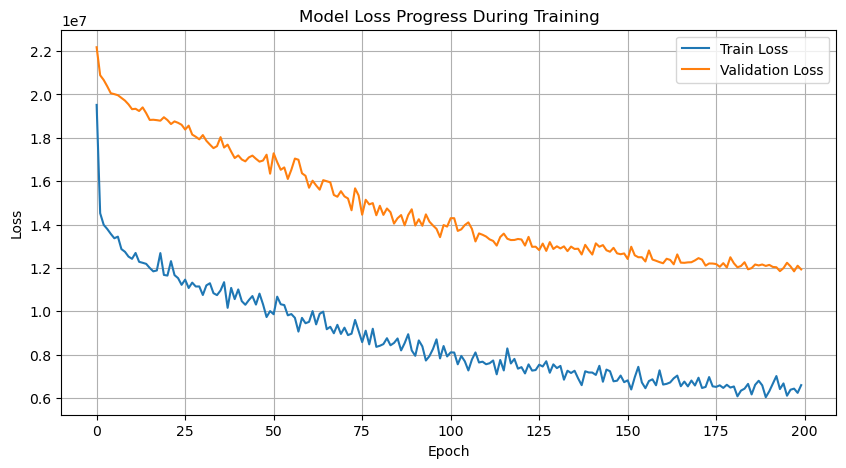

In [61]:
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss Progress During Training')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()

In [63]:
# Evaluate the model
predictions = model.predict(X_test_scaled)
mse = mean_squared_error(y_test, predictions)
print('Mean Squared Error:', mse)

605/605 ━━━━━━━━━━━━━━━━━━━━ 0s 353us/step
Mean Squared Error: 5755234.260375374


### Based on the result

##### Without Feature Selection:
Higher Validation Loss: The validation loss is higher than the training loss and remains relatively stable across epochs, which can be a sign of a model that has learned as much as it can from the data. The fact that the validation loss is not decreasing could mean that the model is not generalizing well beyond the training set.
##### With Feature Selection :
Lower Validation Loss: The validation loss is lower than the first model and the MSE is also lower. This indicates that by selecting features, our model is likely generalizing better and not simply memorizing the training data.
Closer Loss Values: The validation and training loss lines are closer to each other, this is a sign of good generalization. 

##### What These Observations Tell Us:
Feature Selection Improves Performance: Removing irrelevant or less important features can lead to better model performance by reducing noise and focusing the model's learning on the most salient data.
Risk of Overfitting is Reduced: The closer training and validation losses suggest that the risk of overfitting has been mitigated to some extent.

Better Generalization: The lower MSE with feature selection suggests that the model is now generalizing better to unseen data.